# Credit Valuation Adjustment (CVA) Estimation Using Monte Carlo Simulation




**Definition**:  
Credit Valuation Adjustment (CVA) is a crucial risk management metric that quantifies the potential loss due to a counterparty's default in financial transactions, particularly in derivatives trading. It represents the expected loss in value of a portfolio of trades if the counterparty defaults.

**Purpose**:  
CVA is essential for adjusting the valuation of a portfolio to account for the risk that the counterparty may not fulfill their obligations. It reflects the market's perception of the credit risk associated with the counterparty and is vital for effective risk management and pricing strategies.

**Implementation**:  
In this notebook, I'll implement a Monte Carlo simulation to estimate CVA. The simulation will allow to model the exposure of a portfolio over time while incorporating the probabilities of default. By simulating various scenarios, we can better understand the potential credit risk associated with our counterparties.

Implementation Steps:

1. **Import Necessary Libraries**:  
   - Import libraries such as NumPy, Pandas, and Matplotlib for numerical computations and data visualization.

2. **Define Parameters**:  
   - Set the parameters for the simulation, including:
     - Time horizon (e.g., number of years)
     - Number of simulation paths
     - Initial exposure amount
     - Default probabilities
     - Recovery rates

3. **Simulate Exposure Over Time**:  
   - Create a function to simulate the exposure of the portfolio over the defined time horizon. This may involve modeling the underlying asset prices or other relevant factors.

4. **Incorporate Default Probabilities**:  
   - Implement a mechanism to incorporate the probability of default at each time step. This could involve generating random numbers to determine if a default occurs based on the specified probabilities.

5. **Calculate Potential Losses**:  
   - For each simulation path, calculate the potential losses in the event of a default, taking into account the recovery rate.

6. **Estimate CVA**:  
   - Aggregate the results from all simulation paths to estimate the CVA. This may involve calculating the expected loss and discounting it to present value.

7. **Visualize Results**:  
   - Use Matplotlib to create visualizations of the simulation results, such as histograms of potential losses and the distribution of CVA estimates.

8. **Summarize the findings**

   - Discuss the implications of the estimated CVA for risk management and decision-making.




### CVA Formula

Credit Valuation Adjustment represents the difference between the risk-free value of a portfolio of trades and the value of that portfolio when accounting for the possibility of counterparty default. The basic formula for CVA is:


$\text{CVA} = (1 - R) \times \int_0^T \text{EE}(t) \times \text{PD}(t) \, dt$

where:
- T = Time horizon (the period over which the exposure is evaluated)

- R = Recovery rate (the fraction of the exposure that can be recovered in the event of default)

    This is typically estimated based on historical recovery rates for similar types of counterparties.

- $\text{EE}(t)$ = Expected exposure at time t  (the potential future exposure)
   
    This is the average exposure to the counterparty at a given time, that can be estimated using historical data or Monte Carlo simulations.

 - $\text{PD}(t$) = Probability of default at time t 



### CVA estimation using Monte Carlo Simulation

In the context of calculating Credit Valuation Adjustment (CVA), we aim to simulate potential future exposures over a specified time horizon. The log-normal distribution is a suitable choice for this purpose, as it effectively models the behavior of asset prices and exposures that cannot be negative.

The following code demonstrates how to calculate CVA using Monte Carlo simulation for expected exposure, assuming a constant probability of default.

#### Key Components of the Simulation

**Drift**:
   $
   \mu_t = \left(\text{mean\_return} - \frac{1}{2} \cdot \text{volatility}^2\right) \cdot \left(\frac{t}{\text{time\_steps}}\right)
   $
   This formula adjusts the mean return to account for the skewness of the log-normal distribution, ensuring that the expected growth of the asset price is accurately represented over time.

**Volatility**:
   $
   \sigma_t = \text{volatility} \cdot \sqrt{\frac{t}{\text{time\_steps}}}
   $
   This expression scales the volatility according to the time step, reflecting the increased uncertainty over longer periods.

**Expected Exposure (EE(t))**:
   $
   \text{expected\_exposures}[i, t] = \text{initial\_exposure} \cdot \exp(\mu_t + \text{np.random.normal}(0, \sigma_t))
   $
   This equation simulates the exposure at each time step based on the initial exposure, drift, and volatility. It generates a distribution of potential future exposures at each time step, providing an estimate of the average exposure one might expect at that point in time.

#### Calculating CVA

Once we have computed the average expected exposure over the simulation paths, we can calculate the CVA using the previously defined formula:

$
\text{CVA} = (1 - R) \times \int_0^T \text{EE}(t) \times \text{PD}(t) \, dt
$

This process allows us to assess the credit risk associated with a counterparty, enabling informed decisions regarding pricing, risk management, and capital allocation.

### Summary

By employing Monte Carlo simulation to estimate expected future exposures, we can effectively quantify the potential credit risk inherent in financial transactions. This approach not only enhances our understanding of counterparty risk but also aids in the development of robust risk management strategies.



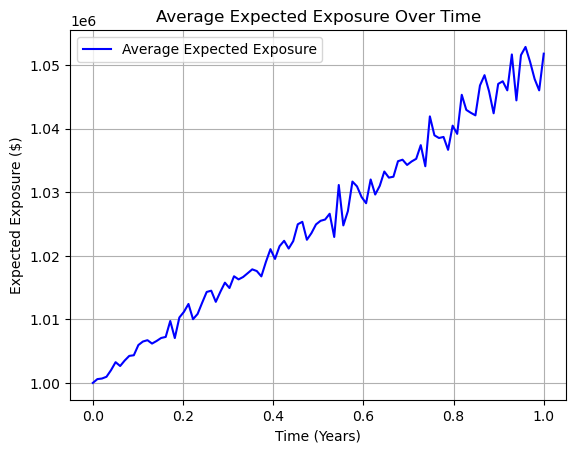

Estimated CVA: $12304.33


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_simulations = 10000  # Number of Monte Carlo simulations
time_horizon = 1  # Time horizon in years
recovery_rate = 0.4  # Recovery rate (40%)
default_probability = 0.02  # Probability of default (2%)
initial_exposure = 1000000  # Initial exposure ($1,000,000)
mean_return = 0.05  # Mean return (5%)
volatility = 0.2  # Volatility (20%)
time_steps = 100  # Number of time steps for simulation

# Simulate expected exposure over time
time_grid = np.linspace(0, time_horizon, time_steps)
expected_exposures = np.zeros((num_simulations, time_steps))

# Simulate exposures using a log-normal distribution
for i in range(num_simulations):
    for t in range(time_steps):
        # Calculate the parameters for the log-normal distribution
        mu_t = (mean_return - 0.5 * volatility**2) * (t / time_steps)
        sigma_t = volatility * np.sqrt(t / time_steps)  # Scale volatility over time
        
        # Simulate exposure at time t
        expected_exposures[i, t] = initial_exposure * np.exp(mu_t + np.random.normal(0, sigma_t))

# Calculate average expected exposure at each time step
avg_expected_exposure = np.mean(expected_exposures, axis=0)

# Calculate CVA
cva = (1 - recovery_rate) * np.sum(avg_expected_exposure * default_probability * (time_horizon / time_steps))

# Plotting the average expected exposure
plt.plot(time_grid, avg_expected_exposure, label='Average Expected Exposure', color='blue')
plt.title('Average Expected Exposure Over Time')
plt.xlabel('Time (Years)')
plt.ylabel('Expected Exposure ($)')
plt.legend()
plt.grid()
plt.show()

# Output the estimated CVA
print(f"Estimated CVA: ${cva:.2f}")


### Interpretation of the CVA Value

 **Monetary Value**:
   - The value of **$12,304.33** indicates the estimated potential loss that could occur due to the default of the counterparty over the specified time horizon (in this case, 1 year). This means that, on average, the firm expects to lose approximately $12,304.33 if the counterparty defaults.

**Risk Assessment**:
   - A CVA of $12,304.33 suggests that the counterparty poses a measurable credit risk. The higher the CVA, the greater the perceived risk of default. Conversely, a lower CVA would indicate a lower risk of default.

 **Impact on Pricing**:
   - Financial institutions often incorporate CVA into their pricing models for derivatives and other financial instruments. This means that the cost of entering into a transaction with a counterparty may be adjusted to reflect the CVA, effectively increasing the price to account for the risk of potential losses.

 **Regulatory Implications**:
   - CVA is also relevant for regulatory capital requirements. Financial institutions may need to hold capital reserves to cover potential losses associated with counterparty risk, and CVA helps determine the amount of capital needed.

 **Comparison**:
   - If you have CVA values for multiple counterparties or transactions, you can compare them to assess relative credit risk. A higher CVA for one counterparty compared to another indicates a higher risk of default.





### Conclusion

In summary, a Credit Valuation Adjustment (CVA) of **$12,304.33** represents the estimated potential loss due to counterparty default over the specified time horizon. This figure is a critical measure for assessing credit risk, as it quantifies the financial exposure that may arise if the counterparty fails to meet their obligations.

The CVA plays a significant role in influencing pricing strategies, as it helps financial institutions determine the appropriate risk premium to charge for taking on counterparty risk. Additionally, it informs capital requirements, ensuring that institutions maintain sufficient reserves to cover potential losses associated with defaults.

By incorporating CVA into risk management practices, financial institutions can make more informed decisions regarding their portfolios, enhance their risk assessment frameworks, and ultimately improve their overall financial stability.



### Next

I will illustrate how machine learning techniques can be applied to enhance counterparty risk modeling. Specifically, I will discuss the use of predictive analytics for estimating default probabilities and improving risk assessments, highlighting the potential benefits and methodologies involved.
